## Housing2 dataset - with 13 additional noise attributes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate
sns.set()

### Part 1: EDA

In [2]:
df = pd.read_csv("housing2(2).csv")
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print("Number of Rows of Data = ", df.shape[0])
print("Number of Columns of Data = ", df.shape[1])

Number of Rows of Data =  506
Number of Columns of Data =  27


In [4]:
# Check the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ATT1     506 non-null    float64
 1   ATT2     506 non-null    float64
 2   ATT3     506 non-null    float64
 3   ATT4     506 non-null    float64
 4   ATT5     506 non-null    float64
 5   ATT6     506 non-null    float64
 6   ATT7     506 non-null    float64
 7   ATT8     506 non-null    float64
 8   ATT9     506 non-null    float64
 9   ATT10    506 non-null    float64
 10  ATT11    506 non-null    float64
 11  ATT12    506 non-null    float64
 12  ATT13    506 non-null    float64
 13  CRIM     506 non-null    float64
 14  ZN       506 non-null    float64
 15  INDUS    506 non-null    float64
 16  CHAS     506 non-null    int64  
 17  NOX      506 non-null    float64
 18  RM       506 non-null    float64
 19  AGE      506 non-null    float64
 20  DIS      506 non-null    float64
 21  RAD      506 non

In [5]:
print("The number of unique values for each column is:")
print(df.nunique())

The number of unique values for each column is:
ATT1       506
ATT2       506
ATT3       506
ATT4       506
ATT5       506
ATT6       506
ATT7       506
ATT8       506
ATT9       505
ATT10      506
ATT11      506
ATT12      506
ATT13      506
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


In [6]:
# Check the number of Nan for each feature
df.isnull().sum()

ATT1       0
ATT2       0
ATT3       0
ATT4       0
ATT5       0
ATT6       0
ATT7       0
ATT8       0
ATT9       0
ATT10      0
ATT11      0
ATT12      0
ATT13      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<font color=blue>After checking the first few rows of the data, the number of unique values for each features, and the isnull method for data frame, we can conclude that there is no missing value for this dataset.</font>

In [7]:
df[df.columns.values[13:]].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 1440x1152 with 0 Axes>

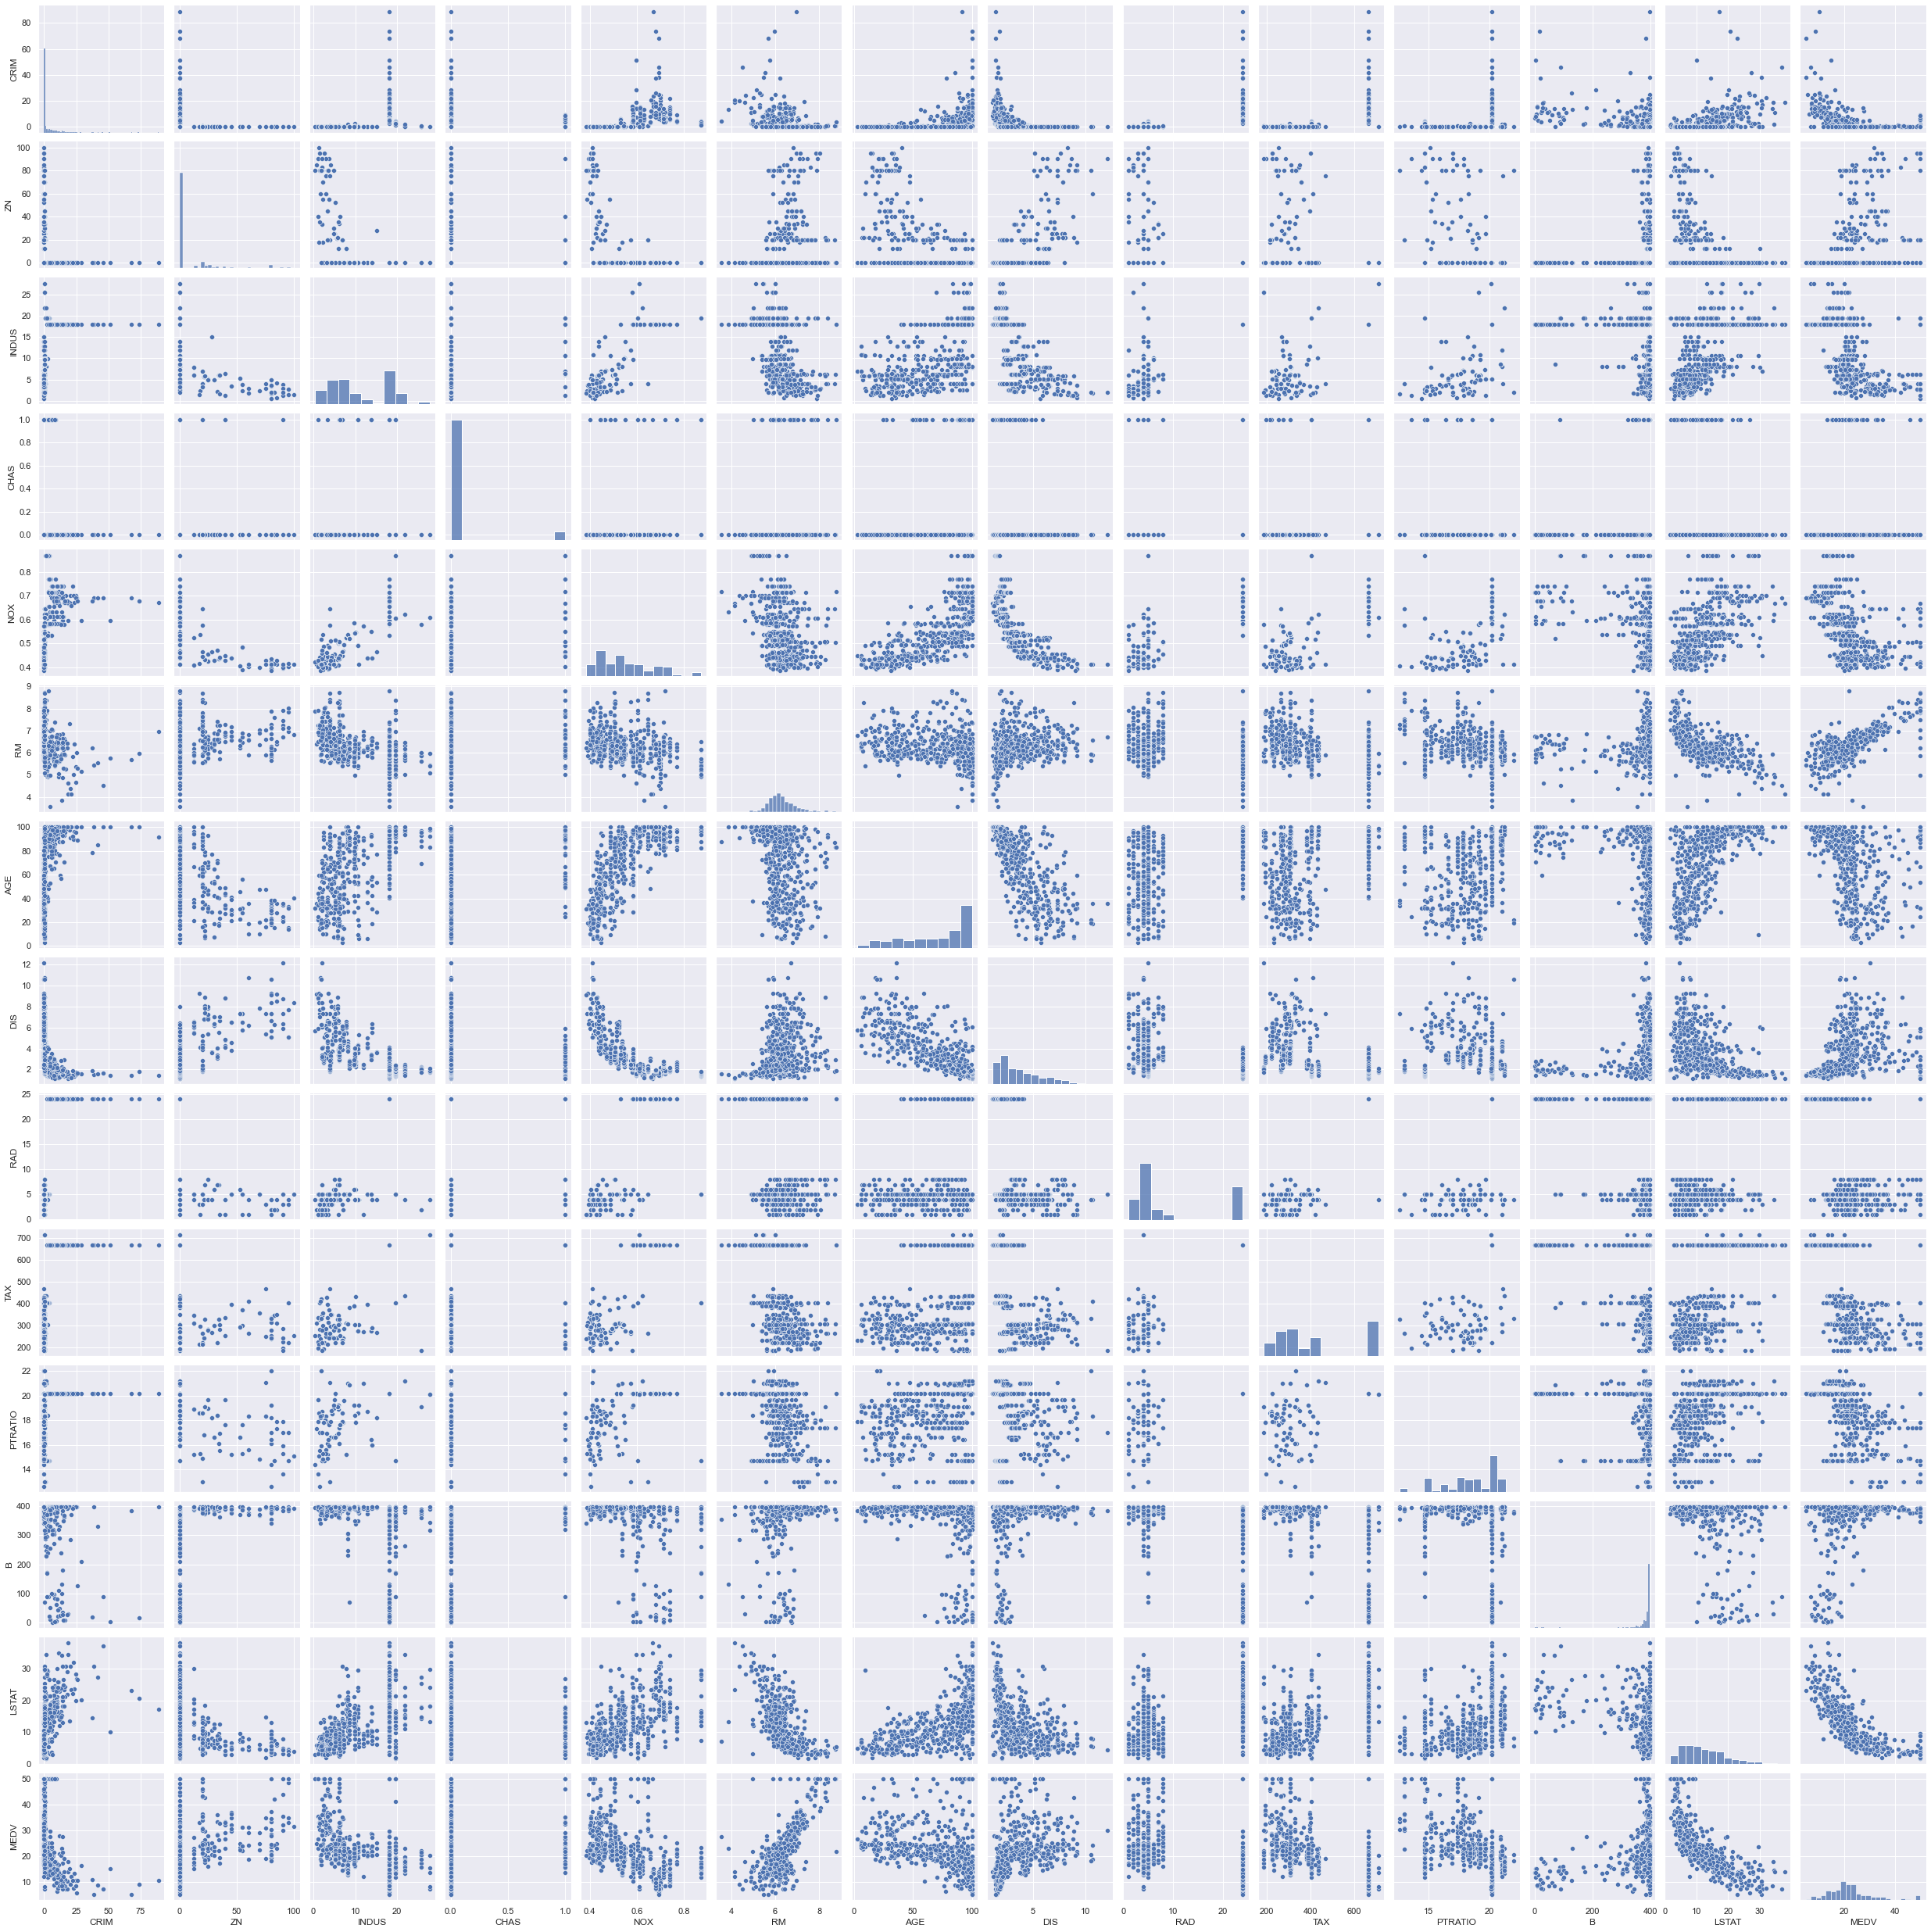

In [8]:
plt.figure(figsize = (20,16))
sns.pairplot(df[df.columns.values[13:]])
plt.show()

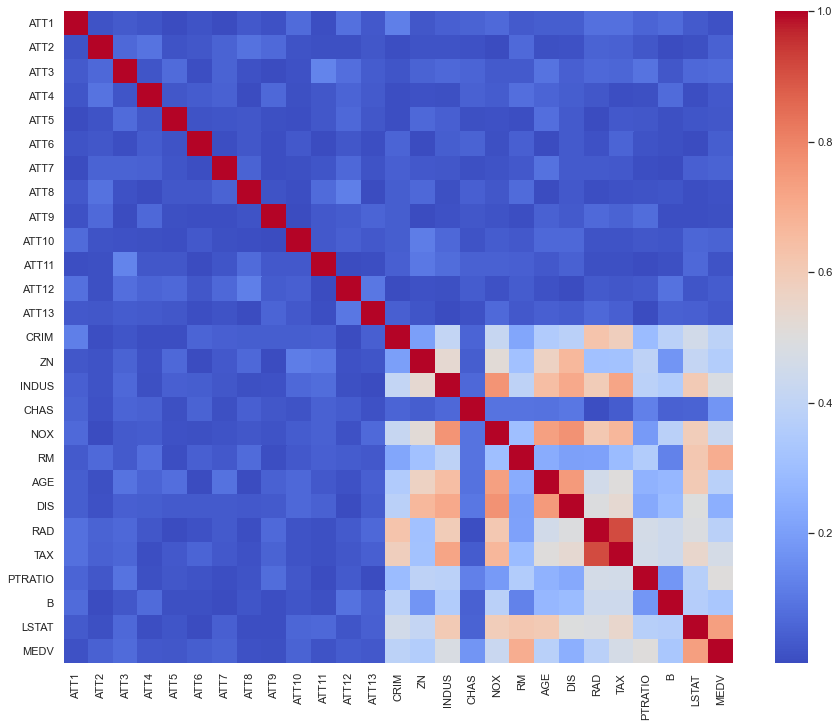

In [9]:
# Plot the absolute value of the corr heatmap
corr_matrix = df.corr().abs()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')
plt.show()

<font color=blue>Obviously, the noise attributes have little correlation with teh MEDV.</font>

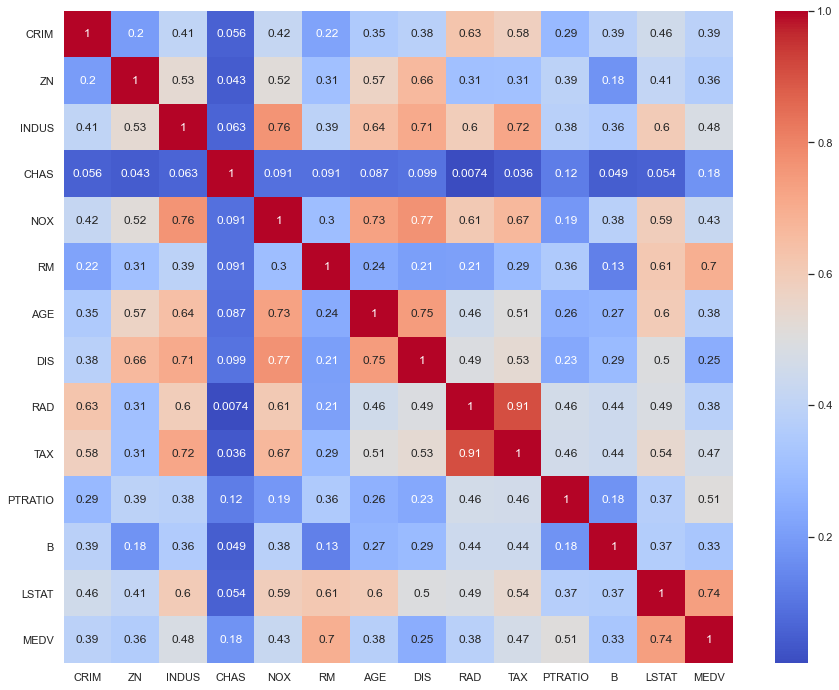

In [10]:
# Plot the absolute value of the corr heatmap
corr_matrix = df[df.columns.values[13:]].corr().abs()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

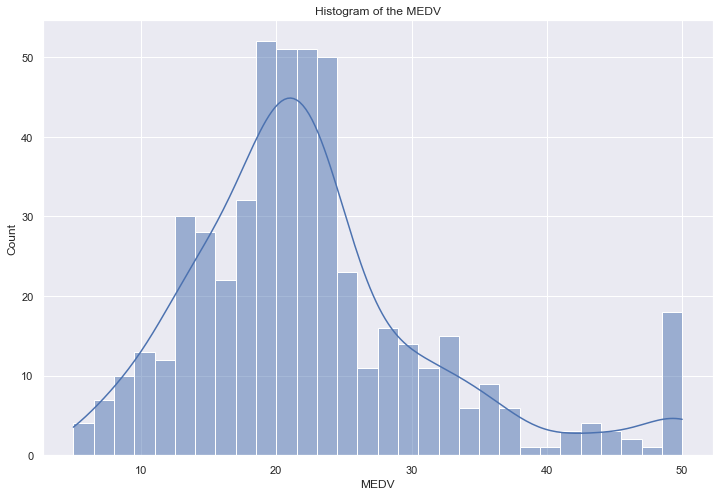

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df['MEDV'], bins = 30, kde = True)
plt.title("Histogram of the MEDV")
plt.show()

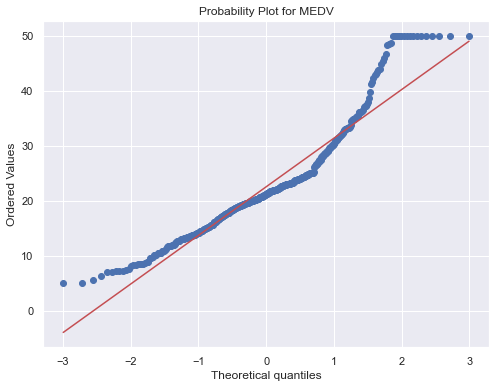

In [12]:
plt.figure(figsize = (8,6))
stats.probplot(df['MEDV'], dist = "norm", plot = plt)
plt.title('Probability Plot for MEDV')
plt.show()

### Part 2: Linear models

#### Simple linear regression

In [13]:
X = df[df.columns.values[:-1]]
y = df['MEDV']
X.shape, y.shape

((506, 26), (506,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
# Standardize the features
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns.values) 
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns.values) 
X_train.shape, X_test.shape

((379, 26), (127, 26))

In [15]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [16]:
lr_train_MSE = mean_squared_error(y_train, lr.predict(X_train))
lr_test_MSE = mean_squared_error(y_test, lr_pred)
lr_train_r2 = r2_score(y_train, lr.predict(X_train))
lr_test_r2 = r2_score(y_train, lr.predict(X_train))
print("The train/test MSE/R-squared are as followed:")
print(lr_train_MSE, lr_test_MSE, lr_train_r2, lr_test_r2)

The train/test MSE/R-squared are as followed:
20.62976565168982 25.429674104147075 0.7607558776864981 0.7607558776864981


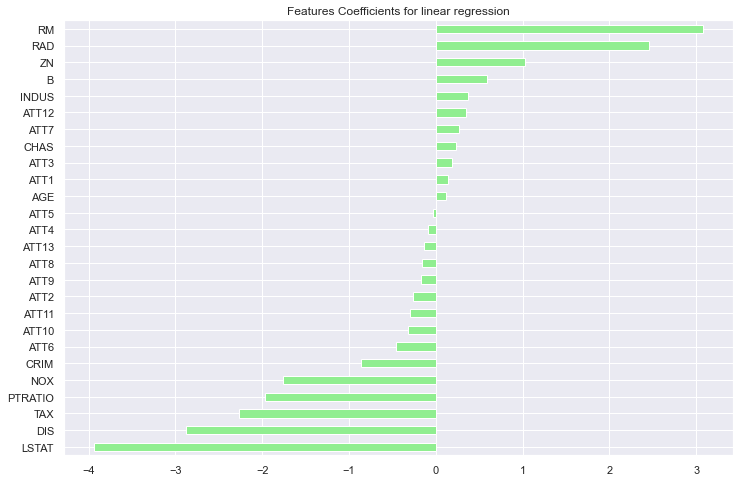

In [17]:
lr_coef = pd.Series(data = lr.coef_,
                        index= X_train.columns)

# Sort importances
lr_coef_sorted = lr_coef.sort_values()

# Draw a horizontal barplot of importances_sorted
lr_coef_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Coefficients for linear regression')
plt.show()

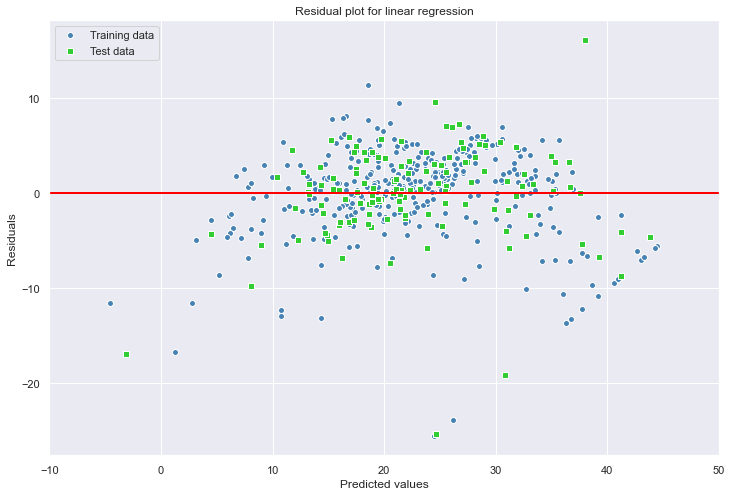

In [18]:
plt.scatter(lr.predict(X_train),  lr.predict(X_train) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(lr_pred,  lr_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for linear regression")
plt.hlines(y = 0, xmin = -20, xmax = 50, color = 'red', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Ridge regression

In [19]:
# Using grid search cross validation to select the best alpha
Ridge_para = {'alpha':[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]}
ridge = Ridge(random_state = 123)
ridge_cv = GridSearchCV(ridge, Ridge_para, scoring = 'r2', cv = 3, n_jobs = -1)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(random_state=123), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]},
             scoring='r2')

In [20]:
print('The best training R-Squared score using cv is {}'.format(np.round(ridge_cv.best_score_, 4)))

The best training R-Squared score using cv is 0.717


In [21]:
print('The best parameters using cv is {}'.format(ridge_cv.best_params_))

The best parameters using cv is {'alpha': 10}


In [22]:
ridge = Ridge(alpha = 10, random_state = 123).fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [23]:
ridge_train_MSE = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_MSE = mean_squared_error(y_test, ridge_pred)
ridge_train_r2 = r2_score(y_train, ridge.predict(X_train))
ridge_test_r2 = r2_score(y_train, ridge.predict(X_train))
print("The train/test MSE/R-squared are as followed:")
print(ridge_train_MSE, ridge_test_MSE, ridge_train_r2, ridge_test_r2)

The train/test MSE/R-squared are as followed:
20.741643940542932 25.47187089623224 0.7594584212114941 0.7594584212114941


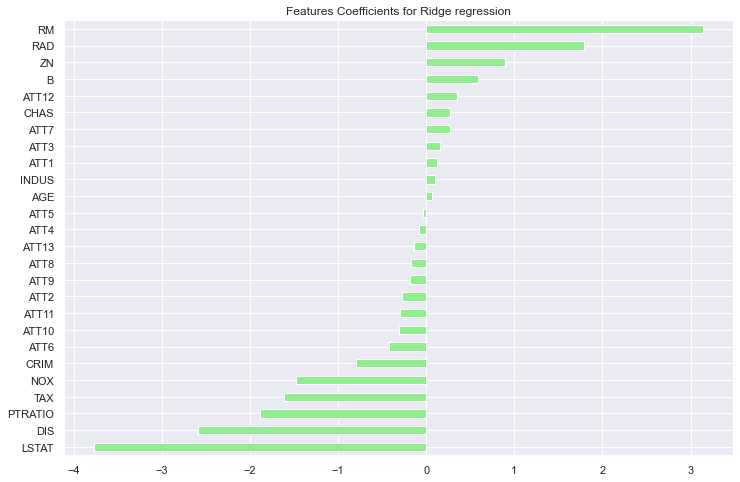

In [24]:
ridge_coef = pd.Series(data = ridge.coef_,
                        index= X_train.columns)

# Sort importances
ridge_coef_sorted = ridge_coef.sort_values()

# Draw a horizontal barplot of importances_sorted
ridge_coef_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Coefficients for Ridge regression')
plt.show()

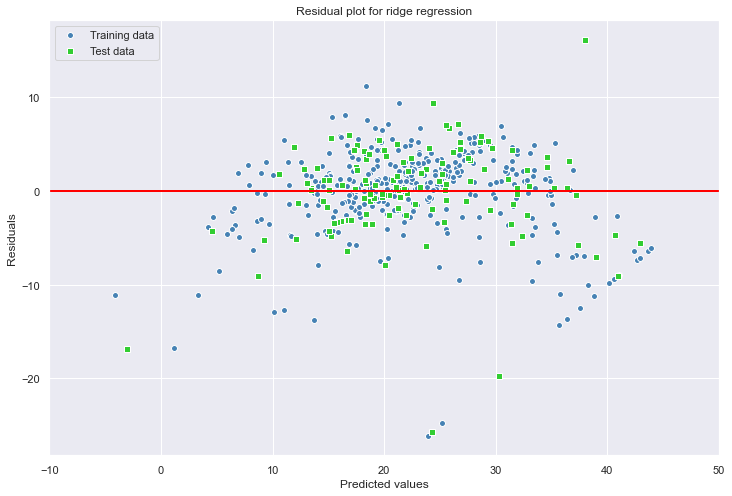

In [25]:
plt.scatter(ridge.predict(X_train),  ridge.predict(X_train) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(ridge_pred,  ridge_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for ridge regression")
plt.hlines(y = 0, xmin = -20, xmax = 50, color = 'red', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Lasso regression

In [26]:
for a in np.arange(0.1, 1, 0.02):
    lasso = linear_model.Lasso(alpha = a, random_state = 123).fit(X_train, y_train)
    if len(lasso.coef_[lasso.coef_ != 0]) <= 13:
        print(np.round(a, 2))
        break

0.3


In [27]:
lasso = linear_model.Lasso(alpha = 0.3, random_state = 123).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
X_train.columns.values[lasso.coef_ != 0]

array(['ATT6', 'ATT10', 'ATT11', 'CRIM', 'CHAS', 'NOX', 'RM', 'DIS',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

**When we increase the penalty to have only 13 features, ATT6, ATT10, and ATT11 are still in the model.**

In [28]:
lasso = linear_model.Lasso(alpha = 0.37, random_state = 123).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
X_train.columns.values[lasso.coef_ != 0]

array(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype=object)

**When we increase alpha to 0.37, all the noise are dropped out, however, we are only left with 9 features.**

In [29]:
lasso_train_MSE = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_MSE = mean_squared_error(y_test, lasso_pred)
lasso_train_r2 = r2_score(y_train, lasso.predict(X_train))
lasso_test_r2 = r2_score(y_train, lasso.predict(X_train))
print("The train/test MSE/R-squared are as followed:")
print(lasso_train_MSE, lasso_test_MSE, lasso_train_r2, lasso_test_r2)

The train/test MSE/R-squared are as followed:
24.15468661580925 30.333073172817134 0.7198772445248975 0.7198772445248975


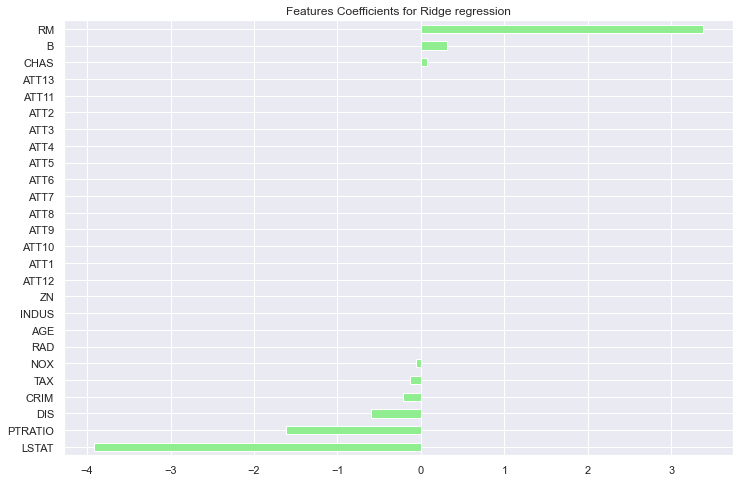

In [30]:
lasso_coef = pd.Series(data = lasso.coef_,
                        index= X_train.columns)

# Sort importances
lasso_coef_sorted = lasso_coef.sort_values()

# Draw a horizontal barplot of importances_sorted
lasso_coef_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Coefficients for Ridge regression')
plt.show()

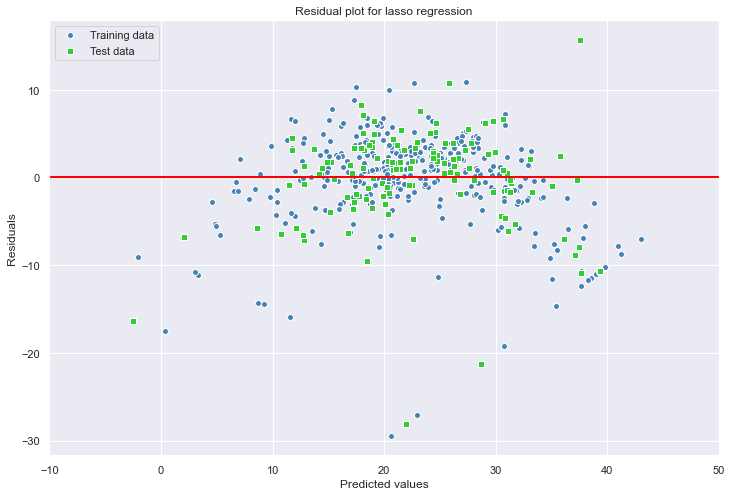

In [31]:
plt.scatter(lasso.predict(X_train),  lasso.predict(X_train) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(lasso_pred,  lasso_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for lasso regression")
plt.hlines(y = 0, xmin = -20, xmax = 50, color = 'red', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Elastic Net

In [32]:
# Using grid search cross validation to select the best alpha
EN_para = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50],
             'l1_ratio': list(np.arange(0.1, 1, 0.1))}
en = ElasticNet(random_state = 123)
en_cv = GridSearchCV(en, EN_para, scoring = 'r2', cv = 3, n_jobs = -1)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(random_state=123), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50],
                         'l1_ratio': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                      0.6, 0.7000000000000001, 0.8, 0.9]},
             scoring='r2')

In [33]:
print('The best training R-Squared score using cv is {}'.format(np.round(en_cv.best_score_, 4)))

The best training R-Squared score using cv is 0.7173


In [34]:
print('The best parameters using cv is {}'.format(en_cv.best_params_))

The best parameters using cv is {'alpha': 0.1, 'l1_ratio': 0.9}


In [35]:
en = ElasticNet(alpha = 0.1, l1_ratio = 0.9, random_state = 123).fit(X_train, y_train)
en_pred = en.predict(X_test)

In [36]:
en_train_MSE = mean_squared_error(y_train, en.predict(X_train))
en_test_MSE = mean_squared_error(y_test, en_pred)
en_train_r2 = r2_score(y_train, en.predict(X_train))
en_test_r2 = r2_score(y_train, en.predict(X_train))
print("The train/test MSE/R-squared are as followed:")
print(en_train_MSE, en_test_MSE, en_train_r2, en_test_r2)

The train/test MSE/R-squared are as followed:
21.20703600675623 26.449808471607547 0.7540612529502179 0.7540612529502179


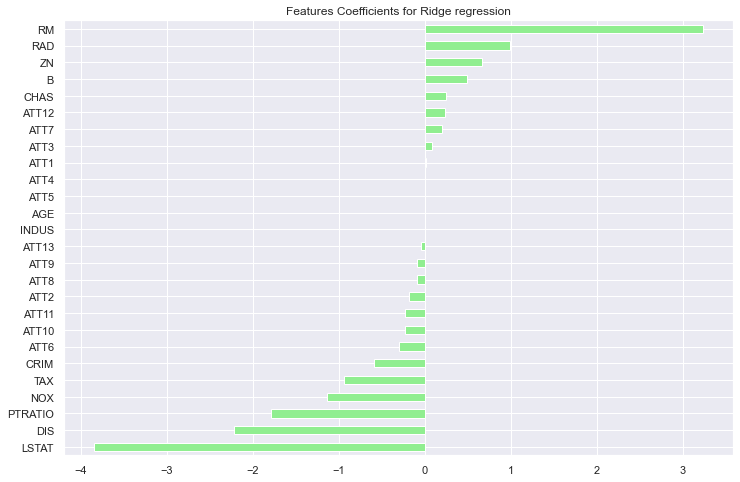

In [37]:
en_coef = pd.Series(data = en.coef_,
                        index= X_train.columns)

# Sort importances
en_coef_sorted = en_coef.sort_values()

# Draw a horizontal barplot of importances_sorted
en_coef_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Coefficients for Ridge regression')
plt.show()

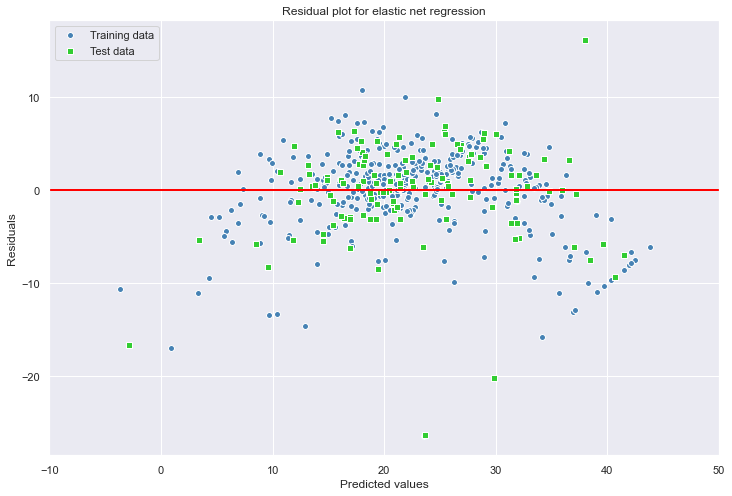

In [38]:
plt.scatter(en.predict(X_train),  en.predict(X_train) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(en_pred,  en_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for elastic net regression")
plt.hlines(y = 0, xmin = -20, xmax = 50, color = 'red', lw = 2)
plt.xlim([-10, 50])
plt.show()

## Implementing the M5 Regression Tree

In [39]:
clf = DecisionTreeRegressor(max_depth = 2, random_state = 123).fit(X_train, y_train)


The first part refers to sklearn example. 
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [40]:
# total number of nodes
n_nodes = clf.tree_.node_count

# id of the left child of node i or -1 if leaf node
children_left = clf.tree_.children_left

# id of the right child of node i or -1 if leaf node
children_right = clf.tree_.children_right

# feature used for splitting node i
feature = clf.tree_.feature

#  threshold value at node i
threshold = clf.tree_.threshold


node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))
leaf_list = np.where(is_leaves == True)[0]

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 18] <= 0.9742422997951508 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 25] <= 0.2265358492732048 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 18] <= 1.6182128190994263 else to node 6.
		node=5 is a leaf node.
		node=6 is a leaf node.


In [41]:
# dot_data = export_graphviz(clf,
#                            filled=True, 
#                            rounded=True,
#                            class_names=['True', 
#                                         'False'],
#                            feature_names=X.columns.values,
#                            out_file=None) 
# graph = graph_from_dot_data(dot_data) 
# graph.write_png('tree.png')

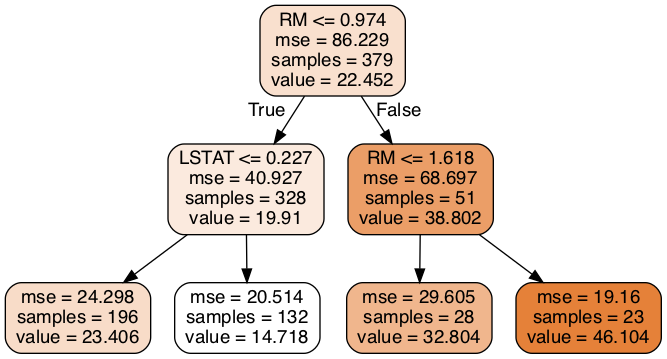

In [42]:
# Display the tree structure
Image(filename='tree.png', width=500)

In [43]:
# This is the test case
test = X_train.iloc[0]
print(test)
print("-----------------------------------------------------------")

def example(x, children_left, children_right, threshold, feature):
    print("Start with node 0.")
    i = 0
    while not is_leaves[i]:
        left = children_left[i]
        right = children_right[i]
        thres = threshold[i]
        feature_num = feature[i]
        if x[feature_num] <= thres:
            i = left
            print("-----------------------------------------------------------")
            print("Go to node {node_number}, since {feature} is less than or equal to {the}".format(
            node_number = left, feature = X_train.columns.values[feature_num], the = np.round(thres, 4)))
        else:
            i = right
            print("-----------------------------------------------------------")
            print("Go to node {node_number}, since {feature} is greater than {the}".format(
            node_number = right, feature = X_train.columns.values[feature_num], the = np.round(thres, 4)))
        if is_leaves[i]:
            print("-----------------------------------------------------------")
            print("Arrive at the leaf node {}, we are done here!".format(i))
            break
    return i, np.where(is_leaves == True)[0]
a, b = example(test, children_left, children_right, threshold, feature)
print(a, b)

ATT1      -0.950717
ATT2      -0.493337
ATT3      -1.105616
ATT4      -0.411264
ATT5       1.175252
ATT6       0.493133
ATT7      -0.788126
ATT8       0.602904
ATT9      -0.844857
ATT10     -1.467248
ATT11      0.557619
ATT12      0.809973
ATT13      0.293200
CRIM      -0.397116
ZN        -0.480598
INDUS     -0.870569
CHAS      -0.254179
NOX       -0.344149
RM        -0.345967
AGE       -1.210384
DIS        1.049891
RAD       -0.519536
TAX       -1.084721
PTRATIO    0.816253
B          0.428609
LSTAT     -0.663662
Name: 0, dtype: float64
-----------------------------------------------------------
Start with node 0.
-----------------------------------------------------------
Go to node 1, since RM is less than or equal to 0.9742
-----------------------------------------------------------
Go to node 2, since LSTAT is less than or equal to 0.2265
-----------------------------------------------------------
Arrive at the leaf node 2, we are done here!
2 [2 3 5 6]


In [44]:
class M5TreeRegressor:
    """A M5 tree regressor.
    
    Parameters
    ----------
    n_nodes : int, default=None
        total number of nodes.
    children_left : numpy.ndarray, default=None
        id of the left child of node i or -1 if leaf node.
    children_right : numpy.ndarray, default=None
        id of the right child of node i or -1 if leaf node.
    threshold : numpy.ndarray, default=None
        threshold value at node i.
    feature : numpy.ndarray, default=None
        feature used for splitting node i.
    modeli : Object, default=None
        Contains the regression model.
        
    Attributes
    ----------
    get_leaf_node_number : list, list
        The inferred node number for input instance X and return the list contains the leaf numbers.
    fit :
        Fit the models
    """
    def __init__(self, 
                 n_nodes = None, 
                 children_left = None,
                 children_right = None,
                 threshold = None,
                 feature = None,
                 model1 = None,
                 model2 = None,
                 model3 = None,
                 model4 = None):
        self.n_nodes = n_nodes
        self.children_left = children_left
        self.children_right = children_right
        self.threshold = threshold
        self.feature = feature
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.model4 = model4

    def get_leaf_node_number(self, X):
        """Get the leaf node number that instance x belongs to
        
        Parameters
        ----------
        X : numpy.ndarray
            input instance.
        
        Returns
        -------
        class_num : the leaf node number instance that X belongs to.
        leaf_list : list contains the leaf numbers
        """
        node_depth = np.zeros(shape = self.n_nodes, dtype = np.int64)
        is_leaves = np.zeros(shape = self.n_nodes, dtype = bool)
        stack = [(0, 0)]  
        while len(stack) > 0:
            node_id, depth = stack.pop()
            node_depth[node_id] = depth

            is_split_node = self.children_left[node_id] != self.children_right[node_id]

            if is_split_node:
                stack.append((self.children_left[node_id], depth + 1))
                stack.append((self.children_right[node_id], depth + 1))
            else:
                is_leaves[node_id] = True
        leaf_list = np.where(is_leaves == True)[0]

        class_num = []
        # Check if X is an 1-d array
        if X.ndim == 1:
            x = X
            i = 0
            while not is_leaves[i]:
                left = self.children_left[i]
                right = self.children_right[i]
                thres = self.threshold[i]
                feature_num = self.feature[i]
                if x[feature_num] <= thres:
                    i = left
                else:
                    i = right
                if is_leaves[i]:
                    break
            class_num.append(i)
        else:
            
            for row in range(X.shape[0]):
                x = X[row]
                i = 0
                while not is_leaves[i]:
                    left = self.children_left[i]
                    right = self.children_right[i]
                    thres = self.threshold[i]
                    feature_num = self.feature[i]
                    if x[feature_num] <= thres:
                        i = left
                    else:
                        i = right
                    if is_leaves[i]:
                        break
                class_num.append(i)
            
        return class_num, leaf_list
    
    def fit(self, X, y, estimator1, estimator2, estimator3, estimator4):
        """Fit the models for each of the partitioned subset of the data
        
        Parameters
        ----------
        X : Pandas DataFrame
            input training dataset.
        
        Returns
        -------
        class_num : the leaf node number instance that X belongs to.
        leaf_list : list contains the leaf numbers
        """
        X_train = X.copy()
        y_train = y.copy()
        classNum, leafList = self.get_leaf_node_number(X_train.values)
        
        self.model1 = estimator1.fit(X_train.iloc[classNum == leafList[0]], 
                                     y_train.iloc[classNum == leafList[0]])
        self.model2 = estimator2.fit(X_train.iloc[classNum == leafList[1]], 
                                     y_train.iloc[classNum == leafList[1]])
        self.model3 = estimator3.fit(X_train.iloc[classNum == leafList[2]], 
                                     y_train.iloc[classNum == leafList[2]])
        self.model4 = estimator4.fit(X_train.iloc[classNum == leafList[3]], 
                                     y_train.iloc[classNum == leafList[3]])
        
    def predict(self, X):
        X_test = X.copy()
        classNum, leafList = self.get_leaf_node_number(X_test.values)
        pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            if classNum[i] == leafList[0]:
                pred[i] = self.model1.predict(X_test.iloc[i].values.reshape(1, -1))
            elif classNum[i] == leafList[1]:
                pred[i] = self.model2.predict(X_test.iloc[i].values.reshape(1, -1))
            elif classNum[i] == leafList[2]:
                pred[i] = self.model3.predict(X_test.iloc[i].values.reshape(1, -1))
            elif classNum[i] == leafList[3]:
                pred[i] = self.model4.predict(X_test.iloc[i].values.reshape(1, -1))
        return pred
        


In [45]:
clf = DecisionTreeRegressor(max_depth = 2, random_state = 123).fit(X_train, y_train)
# total number of nodes
n_nodes = clf.tree_.node_count

# id of the left child of node i or -1 if leaf node
children_left = clf.tree_.children_left

# id of the right child of node i or -1 if leaf node
children_right = clf.tree_.children_right

# feature used for splitting node i
feature = clf.tree_.feature

#  threshold value at node i
threshold = clf.tree_.threshold

In [46]:
M5 = M5TreeRegressor(n_nodes = n_nodes, 
                     children_left = children_left, 
                     children_right= children_right, 
                     threshold = threshold, 
                     feature = feature)
M5.fit(X_train, y_train, LinearRegression(), LinearRegression(), 
       KNeighborsRegressor(n_neighbors = 10, weights = 'distance'), 
       KNeighborsRegressor(n_neighbors = 10, weights = 'distance'))
train_pred = M5.predict(X_train)
M5_train_MSE = mean_squared_error(y_train, train_pred)
M5_train_MSE

7.385040532299479

In [47]:
test_pred = M5.predict(X_test)
M5_test_MSE = mean_squared_error(y_test, test_pred)
M5_test_MSE

24.174609503684948

In [48]:
training_MSE = np.round(np.array([lr_train_MSE, ridge_train_MSE, lasso_train_MSE, en_train_MSE, M5_train_MSE]), 3)
testing_MSE = np.round(np.array([lr_test_MSE, ridge_test_MSE, lasso_test_MSE, en_test_MSE, M5_test_MSE]), 3)
model_names = np.array(['Simple Linear Regression', 'Ridge', 'Lasso', 
                        'Elastic Net', 'M5 Tree Regressor'])
table = pd.DataFrame(np.vstack((training_MSE, testing_MSE)), columns = model_names)
print(tabulate(table, headers='keys', showindex=False, tablefmt="github"))

|   Simple Linear Regression |   Ridge |   Lasso |   Elastic Net |   M5 Tree Regressor |
|----------------------------|---------|---------|---------------|---------------------|
|                      20.63 |  20.742 |  24.155 |        21.207 |               7.385 |
|                      25.43 |  25.472 |  30.333 |        26.45  |              24.175 |


## Summary


     M5 Tree Regressor has an overall better performance on both the training and testing dataset. However, we can see that M5 Tree Regressor has a high variance compared to its excellent performance on the training set. I suppose that is due to the unbalanced partition from the DecisionTreeRegressor. 

     I tested multiple trees for this dataset, though they are not shown here. And I found that the leaf nodes on the left have way better performances than the leaf nodes on the right. For example, when fitting simple linear regression models to the instances that belong to the leaf's node on the left, both models have the training and testing MSE around 20. However, the results from the right-hand side have terrible testing performance, usually above 100, which makes the overall test performance bad. This makes sense since this is a small dataset, and only a small portion of data goes to the right-hand side, which makes the linear regression model unstable.  

     I found two ways to remedy this issue. The first approach is to set a relatively large number for the min sample leaf in the DesitionTreeRegressor, which can make sure we get enough data at the leaf node. However, that doesn't work well on this dataset since this dataset is too small. But I also test M5 Tree Regressor on the diabetes dataset(from the sklearn dataset), and it turns out that M5 can give a better performance on MSE than linear regression models by setting the min sample leaf equals to 80. Another approach is to use KNeighborsRegressor, which works well on this dataset since it works well on a small sample size. My final M5 Tree is to fit two linear regression models on the left of the tree, and two KNeighborsRegressor models on the right of the tree. I believe with hyperparameter tuning, M5 can work pretty well. 



In [49]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
